In [1]:
import numpy as np
import matplotlib.pyplot as plt

from skimage import data
from skimage.draw import ellipse
from skimage import io, color
from skimage import data
from skimage import transform
from skimage import img_as_float

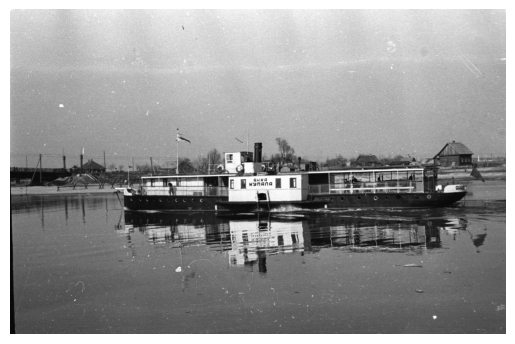

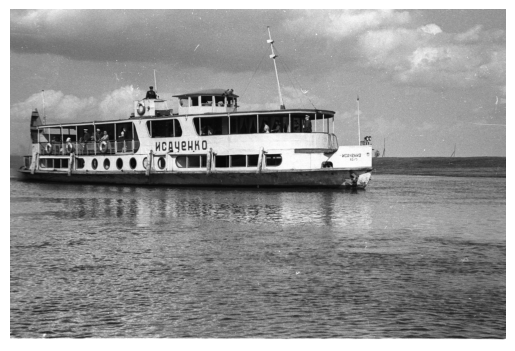

In [2]:
image_files = ['boat1.jpg', 'boat2.png']
images = [io.imread(img_file) for img_file in image_files]

for img in images:
    plt.figure()
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

In [3]:
kernels = [
    np.array([[1, 1, 1, 1, 1],
              [1, 1, 1, 1, 1],
              [1, 1, 1, 1, 1],
              [1, 1, 1, 1, 1],
              [1, 1, 1, 1, 1]]),
    
    np.array([[-1, -1, -1, -1, -1],
              [-1, -1, -1, -1, -1],
              [-1, -1, 0, 0, 0],
              [1, 1, 1, 1, 1],
              [1, 1, 1, 1, 1]]),
    
    np.array([[-1, -1, -1, -1, -1],
              [-1, -1, -1, -1, -1],
              [-1, -1, 0, 1, 1],
              [-1, -1, 1, 1, 1],
              [-1, -1, 1, 1, 1]])
]

## фильтр

In [4]:
def correlate2d(image, kernel):
    image = np.array(image)
    kernel = np.array(kernel)
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape
    pad_height = kernel_height // 2
    pad_width = kernel_width // 2
    
    padded_image = np.pad(image, ((pad_height, pad_height), (pad_width, pad_width)), mode='constant')
    result = np.zeros_like(image) # TODO dtype = int16 
    
    for i in range(image_height):
        for j in range(image_width):
            region = padded_image[i:i + kernel_height, j:j + kernel_width]
            result[i, j] = np.sum(region * kernel)
    
    return result

## фильтруем все ядра для всех картинок

In [5]:
filtered_images = {}

In [6]:
for img_idx, image in enumerate(images):
    for kernel_idx, kernel in enumerate(kernels):
        filtered_image = correlate2d(image, kernel)
        image_name = f'image{img_idx+1}_kernel{kernel_idx+1}.jpg'
        
        # io.imsave(image_name, filtered_image)
        
        filtered_images[(img_idx, kernel_idx)] = filtered_image

## графики

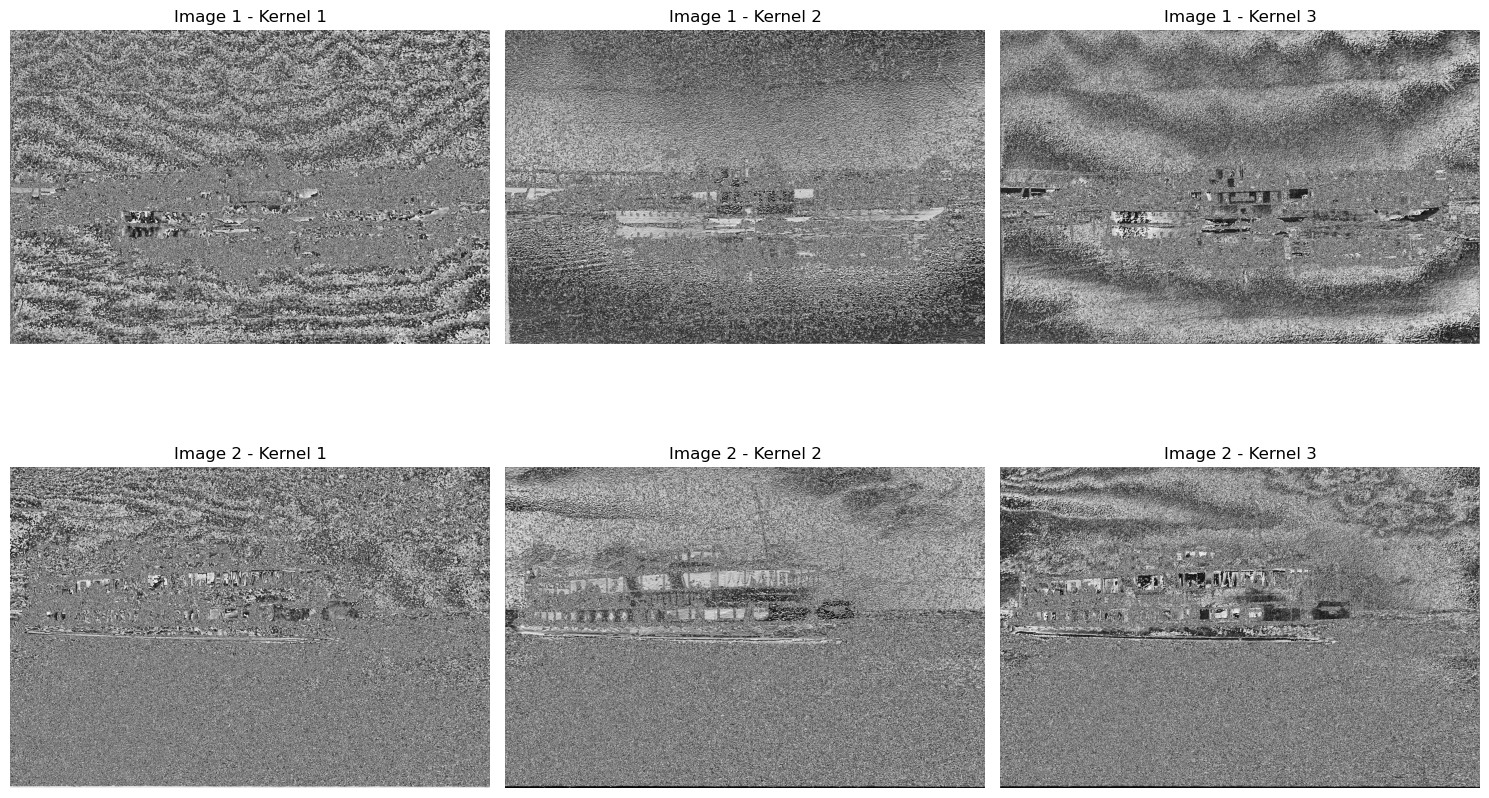

In [7]:
fig, ax = plt.subplots(len(images), len(kernels), figsize=(15, 10))
for img_idx in range(len(images)):
    for kernel_idx in range(len(kernels)):
        ax[img_idx, kernel_idx].imshow(filtered_images[(img_idx, kernel_idx)], cmap='gray')
        ax[img_idx, kernel_idx].set_title(f'Image {img_idx+1} - Kernel {kernel_idx+1}')
        ax[img_idx, kernel_idx].axis('off')

plt.tight_layout()
plt.show()